In [5]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Load the dataset
pk = pd.read_csv('./parkinsons.csv')
pk = pk.dropna()

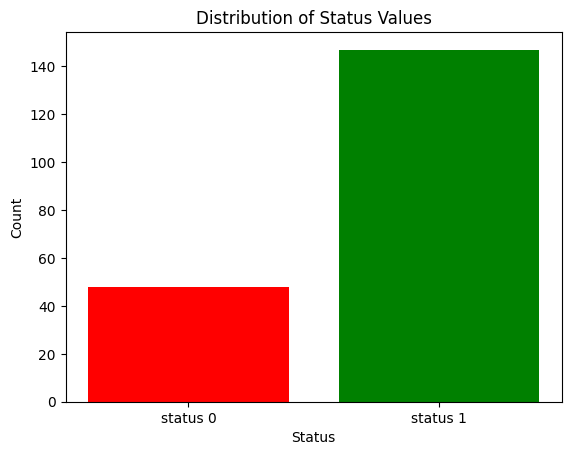

In [7]:
# Create a bar graph to show the distribution of status values
labels = ['status 0', 'status 1']
values = [48, 147]
plt.bar(labels, values, color=['red', 'green'])
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status Values')
plt.show()

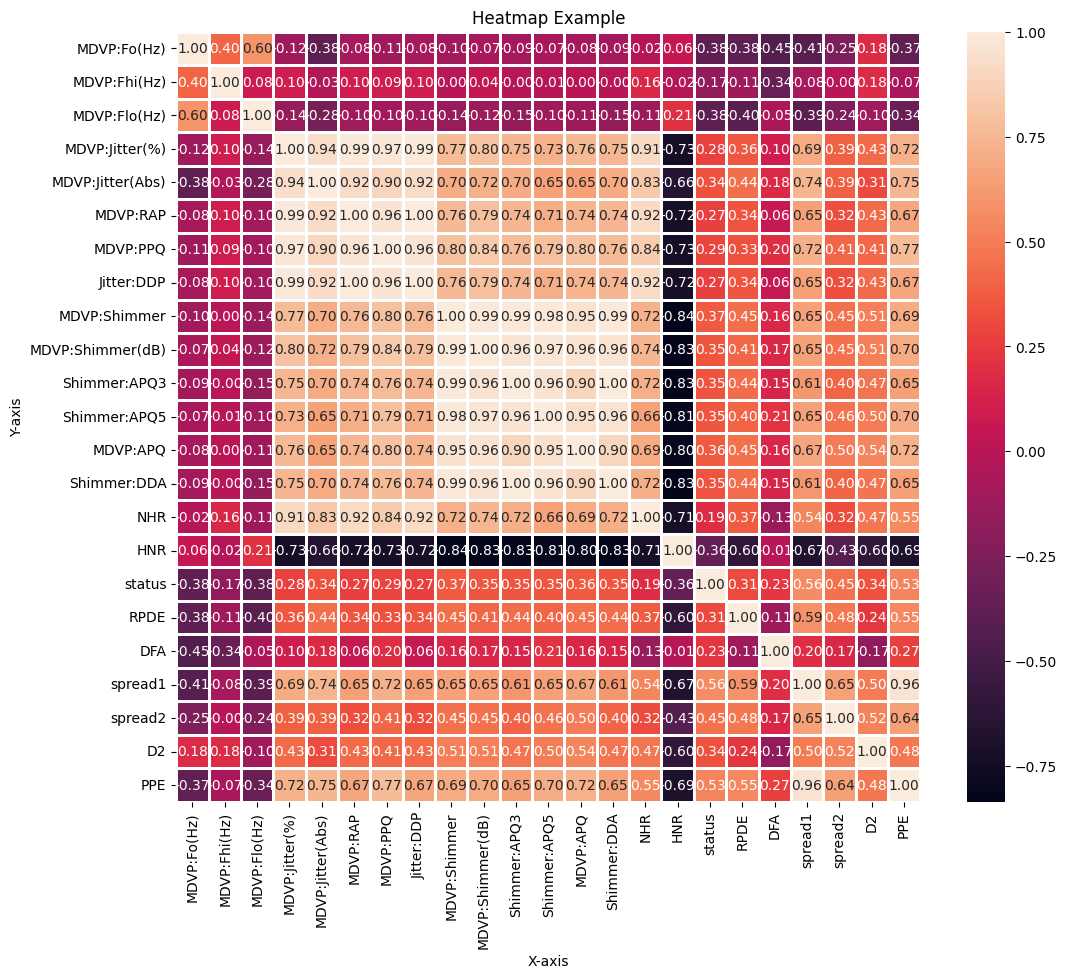

In [8]:
# Create a heatmap to visualize feature correlations
plt.figure(figsize=(12, 10))
sns.heatmap(pk.corr(), annot=True, fmt=".2f", linewidths=1)
plt.title('Heatmap Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

In [9]:
# Preprocessing: Normalize the feature data using MinMaxScaler
remove_list = ['status','name'] 
x = pk.drop(columns=remove_list, axis=1)
y = pk['status']

In [10]:

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [11]:

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=9)

In [12]:
# Hyperparameter tuning using GridSearchCV for SVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svc_grid = GridSearchCV(SVC(), svc_param_grid, cv=5)
svc_grid.fit(x_train, y_train)
best_svc = svc_grid.best_estimator_
pred_svc = best_svc.predict(x_test)
accuracy_svc = accuracy_score(pred_svc, y_test)
print("Best SVC parameters:", svc_grid.best_params_)
print("SVC accuracy:", round(accuracy_svc * 100, 2), "%")

Best SVC parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
SVC accuracy: 92.31 %


In [13]:
# Hyperparameter tuning using GridSearchCV for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'max_iter': [100, 500, 1000]
}

lr_grid = GridSearchCV(LogisticRegression(solver='lbfgs'), lr_param_grid, cv=5)
lr_grid.fit(x_train, y_train)
best_lr = lr_grid.best_estimator_
pred_lr = best_lr.predict(x_test)
accuracy_lr = accuracy_score(pred_lr, y_test)
print("Best LR parameters:", lr_grid.best_params_)
print("Logistic Regression accuracy:", round(accuracy_lr * 100, 2), "%")

Best LR parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2'}
Logistic Regression accuracy: 82.05 %


In [14]:
# Hyperparameter tuning using GridSearchCV for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
dt_grid.fit(x_train, y_train)
best_dt = dt_grid.best_estimator_
pred_dt = best_dt.predict(x_test)
accuracy_dt = accuracy_score(pred_dt, y_test)
print("Best Decision Tree parameters:", dt_grid.best_params_)
print("Decision Tree accuracy:", round(accuracy_dt * 100, 2), "%")

Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Decision Tree accuracy: 74.36 %


In [15]:
# Hyperparameter tuning using GridSearchCV for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid.fit(x_train, y_train)
best_rf = rf_grid.best_estimator_
pred_rf = best_rf.predict(x_test)
accuracy_rf = accuracy_score(pred_rf, y_test)
print("Best Random Forest parameters:", rf_grid.best_params_)
print("Random Forest accuracy:", round(accuracy_rf * 100, 2), "%")

Best Random Forest parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Random Forest accuracy: 92.31 %


In [16]:
# Hyperparameter tuning using GridSearchCV for K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid.fit(x_train, y_train)
best_knn = knn_grid.best_estimator_
pred_knn = best_knn.predict(x_test)
accuracy_knn = accuracy_score(pred_knn, y_test)
print("Best K-Nearest Neighbors parameters:", knn_grid.best_params_)
print("K-Nearest Neighbors accuracy:", round(accuracy_knn * 100, 2), "%")





Best K-Nearest Neighbors parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
K-Nearest Neighbors accuracy: 94.87 %


In [17]:

# Hyperparameter tuning using GridSearchCV for Bagging Classifier
bagging_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bagging_grid = GridSearchCV(BaggingClassifier(), bagging_param_grid, cv=5)
bagging_grid.fit(x_train, y_train)
best_bagging = bagging_grid.best_estimator_
pred_bagging = best_bagging.predict(x_test)
accuracy_bagging = accuracy_score(pred_bagging, y_test)
print("Best Bagging Classifier parameters:", bagging_grid.best_params_)
print("Bagging Classifier accuracy:", round(accuracy_bagging * 100, 2), "%")


Best Bagging Classifier parameters: {'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 100}
Bagging Classifier accuracy: 87.18 %


# precision score F1,recall, confusion matrix 

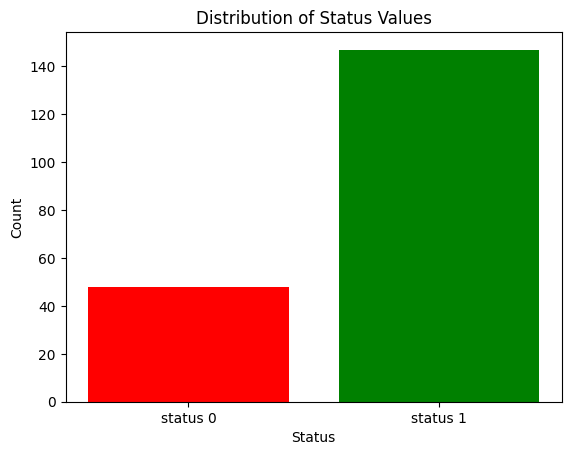

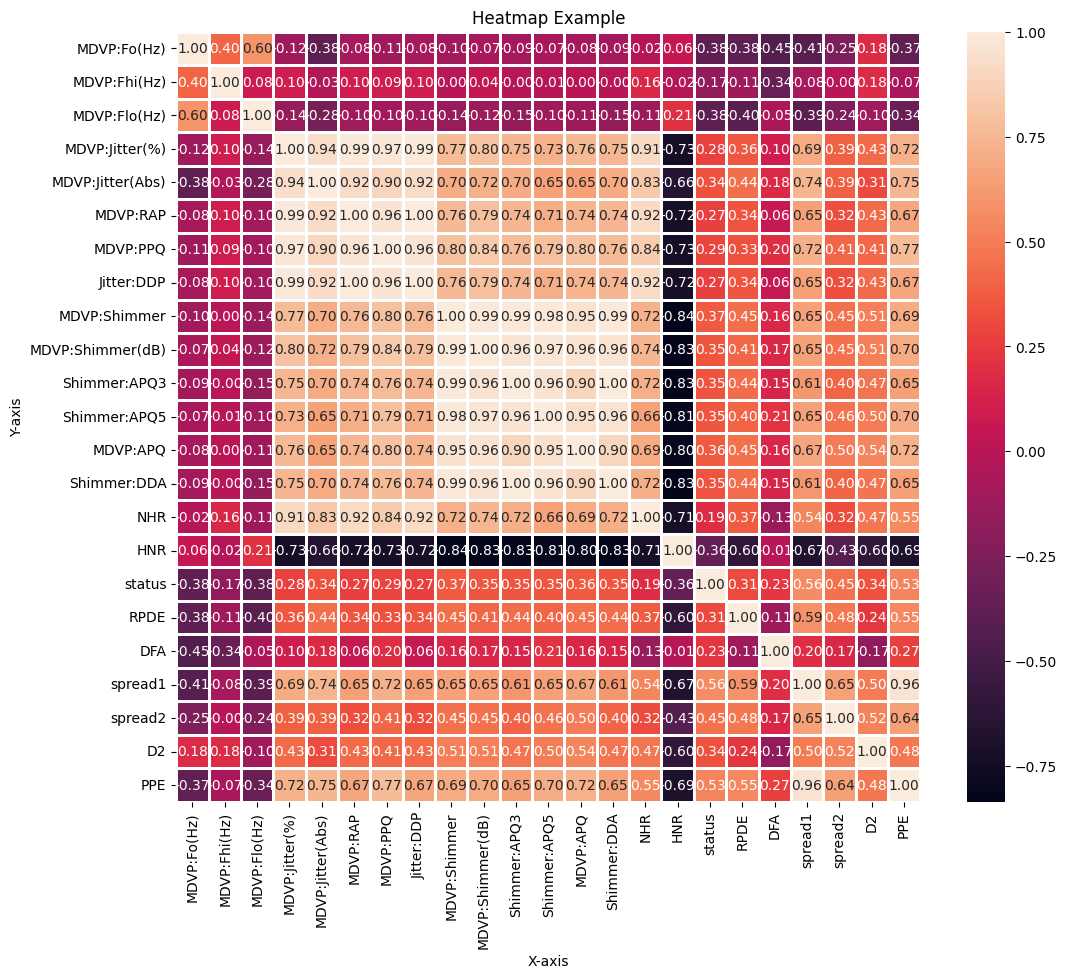

SVC - Precision: 0.9032258064516129
SVC - Recall: 1.0
SVC - F1 Score: 0.9491525423728813


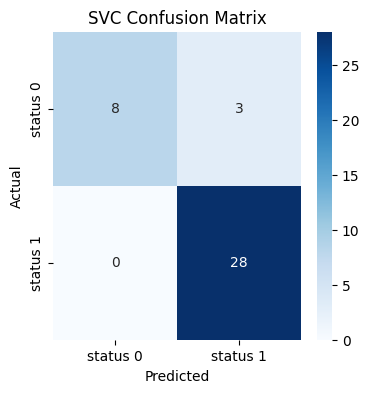

Logistic Regression - Precision: 0.8181818181818182
Logistic Regression - Recall: 0.9642857142857143
Logistic Regression - F1 Score: 0.8852459016393442


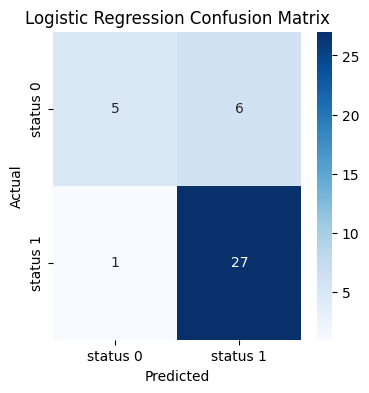

In [21]:
 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Load the dataset
pk = pd.read_csv('./parkinsons.csv')
pk = pk.dropna()

# Create a bar graph to show the distribution of status values
labels = ['status 0', 'status 1']
values = [48, 147]
plt.bar(labels, values, color=['red', 'green'])
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Status Values')
plt.show()

# Create a heatmap to visualize feature correlations
plt.figure(figsize=(12, 10))
sns.heatmap(pk.corr(), annot=True, fmt=".2f", linewidths=1)
plt.title('Heatmap Example')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

# Preprocessing: Normalize the feature data using MinMaxScaler
remove_list = ['status','name'] 
x = pk.drop(columns=remove_list, axis=1)
y = pk['status']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=9)

# Hyperparameter tuning using GridSearchCV for SVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svc_grid = GridSearchCV(SVC(), svc_param_grid, cv=5)
svc_grid.fit(x_train, y_train)
best_svc = svc_grid.best_estimator_

# Calculate precision, recall, F1 score for SVC
pred_svc = best_svc.predict(x_test)
precision_svc = precision_score(y_test, pred_svc)
recall_svc = recall_score(y_test, pred_svc)
f1_svc = f1_score(y_test, pred_svc)
print("SVC - Precision:", precision_svc)
print("SVC - Recall:", recall_svc)
print("SVC - F1 Score:", f1_svc)

# Create confusion matrix for SVC
cm_svc = confusion_matrix(y_test, pred_svc)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues", xticklabels=['status 0', 'status 1'], yticklabels=['status 0', 'status 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVC Confusion Matrix')
plt.show()

# Hyperparameter tuning using GridSearchCV for Logistic Regression
lr_param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'max_iter': [100, 500, 1000]
}

lr_grid = GridSearchCV(LogisticRegression(solver='lbfgs'), lr_param_grid, cv=5)
lr_grid.fit(x_train, y_train)
best_lr = lr_grid.best_estimator_

# Calculate precision, recall, F1 score for Logistic Regression
pred_lr = best_lr.predict(x_test)
precision_lr = precision_score(y_test, pred_lr)
recall_lr = recall_score(y_test, pred_lr)
f1_lr = f1_score(y_test, pred_lr)
print("Logistic Regression - Precision:", precision_lr)
print("Logistic Regression - Recall:", recall_lr)
print("Logistic Regression - F1 Score:", f1_lr)

# Create confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, pred_lr)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=['status 0', 'status 1'], yticklabels=['status 0', 'status 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()




K-Nearest Neighbors - Precision: 0.9333333333333333
K-Nearest Neighbors - Recall: 1.0
K-Nearest Neighbors - F1 Score: 0.9655172413793104


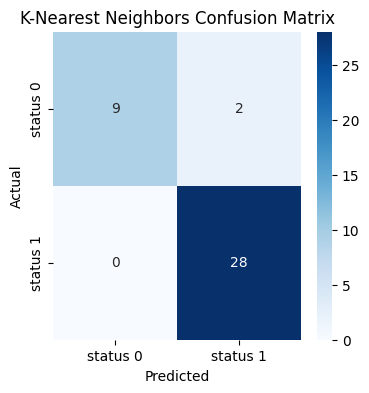

Bagging Classifier - Precision: 0.8709677419354839
Bagging Classifier - Recall: 0.9642857142857143
Bagging Classifier - F1 Score: 0.9152542372881356


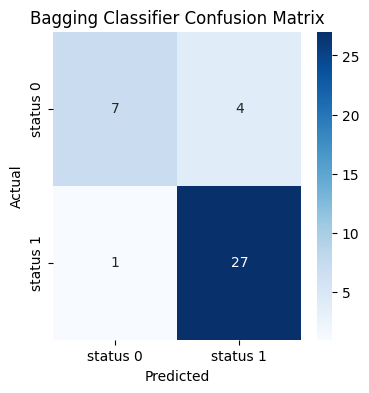

In [19]:

# Hyperparameter tuning using GridSearchCV for K-Nearest Neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), knn_param_grid, cv=5)
knn_grid.fit(x_train, y_train)
best_knn = knn_grid.best_estimator_

# Calculate precision, recall, F1 score for K-Nearest Neighbors
pred_knn = best_knn.predict(x_test)
precision_knn = precision_score(y_test, pred_knn)
recall_knn = recall_score(y_test, pred_knn)
f1_knn = f1_score(y_test, pred_knn)
print("K-Nearest Neighbors - Precision:", precision_knn)
print("K-Nearest Neighbors - Recall:", recall_knn)
print("K-Nearest Neighbors - F1 Score:", f1_knn)

# Create confusion matrix for K-Nearest Neighbors
cm_knn = confusion_matrix(y_test, pred_knn)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['status 0', 'status 1'], yticklabels=['status 0', 'status 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.show()

# Hyperparameter tuning using GridSearchCV for Bagging Classifier
bagging_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

bagging_grid = GridSearchCV(BaggingClassifier(base_estimator=DecisionTreeClassifier()), bagging_param_grid, cv=5)
bagging_grid.fit(x_train, y_train)
best_bagging = bagging_grid.best_estimator_

# Calculate precision, recall, F1 score for Bagging Classifier
pred_bagging = best_bagging.predict(x_test)
precision_bagging = precision_score(y_test, pred_bagging)
recall_bagging = recall_score(y_test, pred_bagging)
f1_bagging = f1_score(y_test, pred_bagging)
print("Bagging Classifier - Precision:", precision_bagging)
print("Bagging Classifier - Recall:", recall_bagging)
print("Bagging Classifier - F1 Score:", f1_bagging)

# Create confusion matrix for Bagging Classifier
cm_bagging = confusion_matrix(y_test, pred_bagging)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_bagging, annot=True, fmt="d", cmap="Blues", xticklabels=['status 0', 'status 1'], yticklabels=['status 0', 'status 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Bagging Classifier Confusion Matrix')
plt.show()

# ... Continue with other classifiers if needed ...


Decision Tree - Precision: 0.92
Decision Tree - Recall: 0.8214285714285714
Decision Tree - F1 Score: 0.8679245283018867


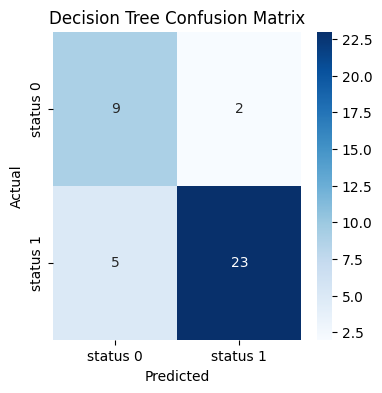

Random Forest - Precision: 0.875
Random Forest - Recall: 1.0
Random Forest - F1 Score: 0.9333333333333333


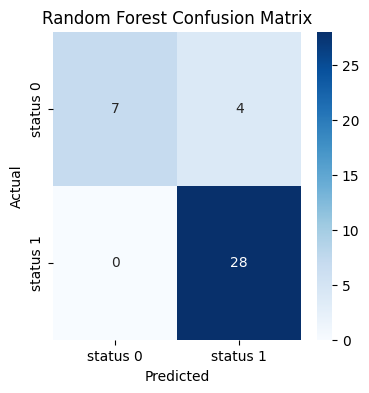

In [20]:

# Hyperparameter tuning using GridSearchCV for Decision Tree
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_grid = GridSearchCV(DecisionTreeClassifier(), dt_param_grid, cv=5)
dt_grid.fit(x_train, y_train)
best_dt = dt_grid.best_estimator_

# Calculate precision, recall, F1 score for Decision Tree
pred_dt = best_dt.predict(x_test)
precision_dt = precision_score(y_test, pred_dt)
recall_dt = recall_score(y_test, pred_dt)
f1_dt = f1_score(y_test, pred_dt)
print("Decision Tree - Precision:", precision_dt)
print("Decision Tree - Recall:", recall_dt)
print("Decision Tree - F1 Score:", f1_dt)

# Create confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, pred_dt)
plt.figure(figsize=(4,4))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues", xticklabels=['status 0', 'status 1'], yticklabels=['status 0', 'status 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Hyperparameter tuning using GridSearchCV for Random Forest
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, cv=5)
rf_grid.fit(x_train, y_train)
best_rf = rf_grid.best_estimator_

# Calculate precision, recall, F1 score for Random Forest
pred_rf = best_rf.predict(x_test)
precision_rf = precision_score(y_test, pred_rf)
recall_rf = recall_score(y_test, pred_rf)
f1_rf = f1_score(y_test, pred_rf)
print("Random Forest - Precision:", precision_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1 Score:", f1_rf)

# Create confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, pred_rf)
plt.figure(figsize=(4, 4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=['status 0', 'status 1'], yticklabels=['status 0', 'status 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


